In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# vamos a implementar un modelo de regresión lineal, primero simple y luego múltiple-     "/content/drive/MyDrive/Python Machine Learning JGG/datasets"

In [ ]:
# hay dos metodos, usar el paquete statsmodel que tiene un metodo llamado OLS, el otro métodos es el scikit-learn

In [ ]:
# haremos la regresión simple usando el primer método y la múltiple con el primero y el segundo:

# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/ads/Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# habiamos visto en lecciones anteriores que el gasto en TV estaba muy correlacionado con las ventas. Vamos a buscar una relación lineal entre el gasto de TV y las ventas (regresión lineal simple)

In [5]:
import statsmodels.formula.api as smf

In [6]:
# linear model = lm
# (el ultimo data es el nombre de mi dataset que justamente he llamado también "data")
# le añado el método fit()

lm = smf.ols(formula="Sales~TV", data = data).fit()

In [7]:
lm

In [8]:
# intercept es la alfa
# TV es la beta

lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
# el modelo lineal predictivo sería:

Sales = 7.032594 + 0.047537 * TV

In [ ]:
# un incremento de 100 en TV, se traduce en 4,7 ventas adicionales de producto

# todos estos parametros son estimados, tienen un p valor asociado, que nos dice si es pequeño (que se puede aceptar que ese parametro no es cero y que tiene por tanto significancia estadistica) 
# o que es alto y entonces podremos decir que es cero y no pinta nada en el modelo lineal

In [ ]:
# si establecemos 0.05 el nivel de significatividad, entonces preguntamos al modelo los p-values:

In [9]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
# vemos que son muy muy pequeños, con lo que decimos que los parámetros que no son cero

In [ ]:
# vamos a ver la eficacia del modelo con R2

In [10]:
lm.rsquared

0.611875050850071

In [11]:
lm.rsquared_adj

0.6099148238341623

In [ ]:
# podemos sacar un resumen de todo

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        05:59:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# en este resumen de arriba vemos que el F statistic es alto y su p valor (Prob(F-statistic)) es muy bajo. nos sugiere que los parametros son todos significantes y no nulos. la predicción va a ser buena
# cuanto mayor sean AIC y BIC mejor
# también nos da los coef (7.03 y 0.0475), el error standard, el t valor, el p valor, un intervalo de confianza para cada uno de los valores (en este caso 95%)

In [ ]:
# vale, hasta ahora hemos creado el modelo, pero, ¿puedo usar el modelo para predecir valores a futuro?
# sí, podemos usar el modelo para intentar predecir las ventas basadas en la ecuación que acabamos de hallar

In [13]:
# en este caso tengo solo un parámetro de entrada (TV), no le puedo pasar solo un dataframe, sino solo una columna, pero si le paso una columna no es un dataframe, es un array. por eso transformo a dataframe el TV

sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [ ]:
# estos valores que ha predicho, ¿son correctos? ¿se ajustan? tengamos en cuenta que estos valores los saca directamente con la ecuación calculada teniendo en cuenta los valores de TV
# podemos hacer un plot para compararlos

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


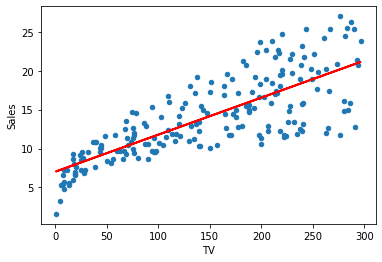

In [16]:
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c= "red", linewidth = 2)

In [ ]:
# la linea roja es el modelo lineal que mejor se ajusta
# los puntos azules son los datos originales del dataset

In [17]:
#podemos calcular el error estandar residual

# añado la columna de las predicciones de venta:
data["sales_pred"]=7.032594 + 0.047537*data["TV"]

In [18]:
# añado la columna de RSE
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [19]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [20]:
RSE = np.sqrt((SSD)/(len(data)-2))

In [21]:
RSE

3.258656369238098

In [ ]:
# esto de arriba es la desviación tipica (3.25 puntos arriba o abajo con respecto a las ventas)

In [22]:
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [ ]:
# esto de arriba son la ventas promedio

In [23]:
error = RSE/sales_m

In [24]:
error

0.23238768901680143

In [ ]:
# hay un 23% del modelo que no queda explicado, a pesar que los parámetros estaban muy bien calculados ya que los p valores eran muy pequeños
# nos gustaría que fuera más pequeño


In [ ]:
# podríamos pintar el histograma de los errores para comprobar cómo se distribuyen los errores respecto del modelo

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

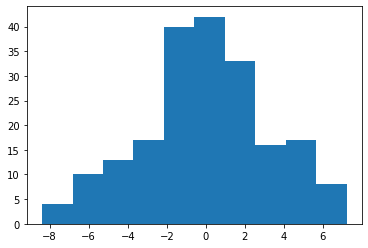

In [25]:
plt.hist(data["Sales"]-data["sales_pred"])

In [ ]:
# el histograma se ve que una distribución normal

In [ ]:
# cómo podríamos hacer para reducir el error y y aumentar el R2. quizá podemos usar los otros dos datos (periodicos y radio) para elaborar nuestro modelo (regresión lineal multiple)

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [ ]:
# calcularemos los beta_i. Cada uno tendrá un p valor asociado. cuanto menor, mayor la significatividad (mayor será su aporte para el modelo). si alguna es muy grande, la eliminamos del modelo 

In [ ]:
# se supone que al usar más variables, aumentamos la eficacia del modelo
# tambien aumenta la complejidad de la elaboración, ya que tenemos que probar qué variables funcionan y qué variables no

In [ ]:
# en este caso, nos salen 7 modelos (1 vble predictora para los tres primeros, 2 vbles. predictoras para las tres siguientes, y tres vbles. predictoras para la última)
# en total salen 2^k - 1 cantidad de modelos, siendo k las varibles predictoras
# si tenemos 10 vbles, nos salen 1023 diferentes modelos
# hay que empezar con un modelo lineal con cada variable, luego nos quedamos con las vbles con los menores p valores y quitamos las más altas.
# por ejemplo, nos ponemos un limite para el p valor (0,05 por ejemplo) y lo que esté por debajo lo usaremos, las que estén por arriba las echamos fuera del modelo
# también podemos empezar a incluir una variable al modelo que eleve el valor de R2 (no es algo 100% fiable, pero es un punto de partida). por eso también aparece el R2 ajustado

In [ ]:
# hay dos enfoques para elegir vbles predictoras y conformar el modelo:

    # La selección hacia adelante (enfoque constructivo):
        # empezamos con un modelo nulo (sin vbles predictoras) y empezar a añadir vbles una a una. si al añadir una vble resulta en un modelo con una suma de errores residuales menor será la primera en añadirse al modelo. 
        # De todas la que tenga menor suma de los cuadrados residuales. si el p valor para la vble es lo suficientemente pequeña y el valor del R2 ajustado sube, entonces la vble predictora se irá incluyendo 
        # sucesivamente en el modelo. en caso contrario, no se añade.

    # La selección hacia atrás (enfoque destructivo):
        # plantea lo contrario, uno empieza con todas las vbles predictoras posibles añadidas y las vamos descartando una a una. 
        # si el p valor de una vble predictora es lo suficientemente grande y el valor del R2 ajustado no aumenta al ser eliminada, entonces esa variable se rechaza, si no, la mantenemos como parte del modelo.
        # tambien podría ser que el p valor fuera alto pero que el R2 ajustado se mantuviera o bajara drásticamente al ser eliminada. si baja mucho el R2 ajustado, tampoco nos conviene quitarla

# python permite automatizar estas dos soluciones. 
# ahora vamos a hacerlo manualmente


In [ ]:
# ya tenemos un modelo con TV-Sales
# ignoramos ahora Sales-Newspaper y Sale-Radio por separado porque ambas tenían una menor correlación. (notebook anterior)
# entonces, añadimos newspaper y radio al modelo que tenemos de Sales-TV

In [26]:
# añadimos primero newspaper:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [27]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [28]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [ ]:
# siguen siendo pequeños (incluso el del newspaper, que aunque no es tan pequeños como los otros, sigue siendo pequeño)
# nos queda un modelo así:
# Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper

In [29]:
lm2.rsquared

0.6458354938293271

In [30]:
lm2.rsquared_adj

0.6422399150864777

In [ ]:
# hemos mejorado algo con respecto al modelo anterior, de 0.60 a 0.64

In [31]:
# vamos a hacer unas predicciones
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [32]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [33]:
SSD = data["RSE"] = sum((data["Sales"]-sales_pred)**2)

In [34]:
SSD

1918.561811896827

In [35]:
RSE = np.sqrt(SSD/(len(data)-2-1)) #ojo, es -3 porque estoy usando dos vbles predictoras

In [36]:
RSE

3.120719860252885

In [ ]:
# también hemos bajado un poco, de 3.25 a 3.12

In [37]:
error = RSE / sales_m

In [38]:
error

0.2225508903728212

In [ ]:
# algo bajamos, de 23% a 22%, pero tampoco mucho

In [40]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           3.95e-45
Time:                        06:14:45   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# conclusión:
    # han mejorado todos los valores, pero no mucho, por lo tanto, añadir el periódico no nos ha aportado gran cosa

In [ ]:
# vamos a añadir la radio al modelo inicial:

In [44]:
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [45]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.83e-98
Time:                        06:21:25   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ahora sí que tenemos un F-statistic muy grande, el Prob(F-statistic) ha bajado muchísimo
# R2 y R2 ajustado están cerca del 90%

In [46]:
sales_pred = lm3.predict(data[["TV", "Radio"]])

In [47]:
SSD = data["RSE"] = sum((data["Sales"]-sales_pred)**2)

In [48]:
RSE = np.sqrt(SSD/(len(data)-2-1))

In [49]:
RSE

1.6813609125080011

In [50]:
error = RSE / sales_m

In [51]:
error

0.11990450436855062

In [ ]:
# hemos bajado del 23% al 12%

In [ ]:
# concluimos que tv y radio juntos predicen mejor.

In [ ]:
# qué pasaría si juntamos los tres?

In [52]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [53]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        06:24:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# viendo este resumen podemos decir:
    # los R2 no mejoran
    # los F tampoco
    # el coeficiente del Newspaper (-0.0010) es casi cero, e incluso al ser negativo, implica que invertir en newspaper resta ventas
    # el intervalo de confianza [0.025	0.975] = -0.013	0.011, coge el cero
    # el p valor es 0.860, casi 1

# vemos que los R2 son iguales al de antes, pero el p valor es tan alto que podemos aceptar la hipotesis nula, este coef. tiene todas las papeletas para ser cero
# el RSE da algo mayor
# el error aumenta algo

# conclusión, este método predice pero

In [54]:
sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])
SSD = data["RSE"] = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))
RSE

1.6855103734147436

In [55]:
error = RSE / sales_m
error

0.12020041885646236

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [ ]:
# qué significado tiene que nuestro modelo se haya comportado peor al añadirle newspaper
# la multicolinealidad es la razón

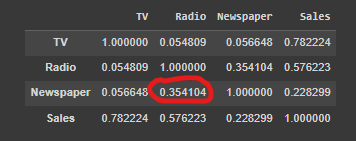

In [ ]:
# cuando vimos la correlación entre las tres variables (T3-1), pudimos observar que entre Radio y Newspaper había alta colinealidad. cuando esto pasa, alguna de las variables habría que quitarlas.
# para esto se usa VIF

In [ ]:
# para aplicar el método, ponemos la vble que nos da problemas en función de otras vbles predictoras:

In [ ]:
# calculamos tres R^2 y tres VIF:

In [ ]:
# estamos calculando modelos sin las ventas solo para ver la multicolinealidad

In [56]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [57]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.00461078493965

In [58]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

In [ ]:
# observamos que radio y newspaper tienen casi el mismo VIF, lo que siginifica que estas dos vbles están correlacionadas. pero no con la TV, ya que la TV es 1.

In [ ]:
# finalmente, nos quedamos entonces con el lm3

In [59]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.83e-98
Time:                        06:59:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""